# Exercise Review: Natural Language Processing - EXPLORATION

<a href = "https://ds.codeup.com/nlp/explore/#exercises">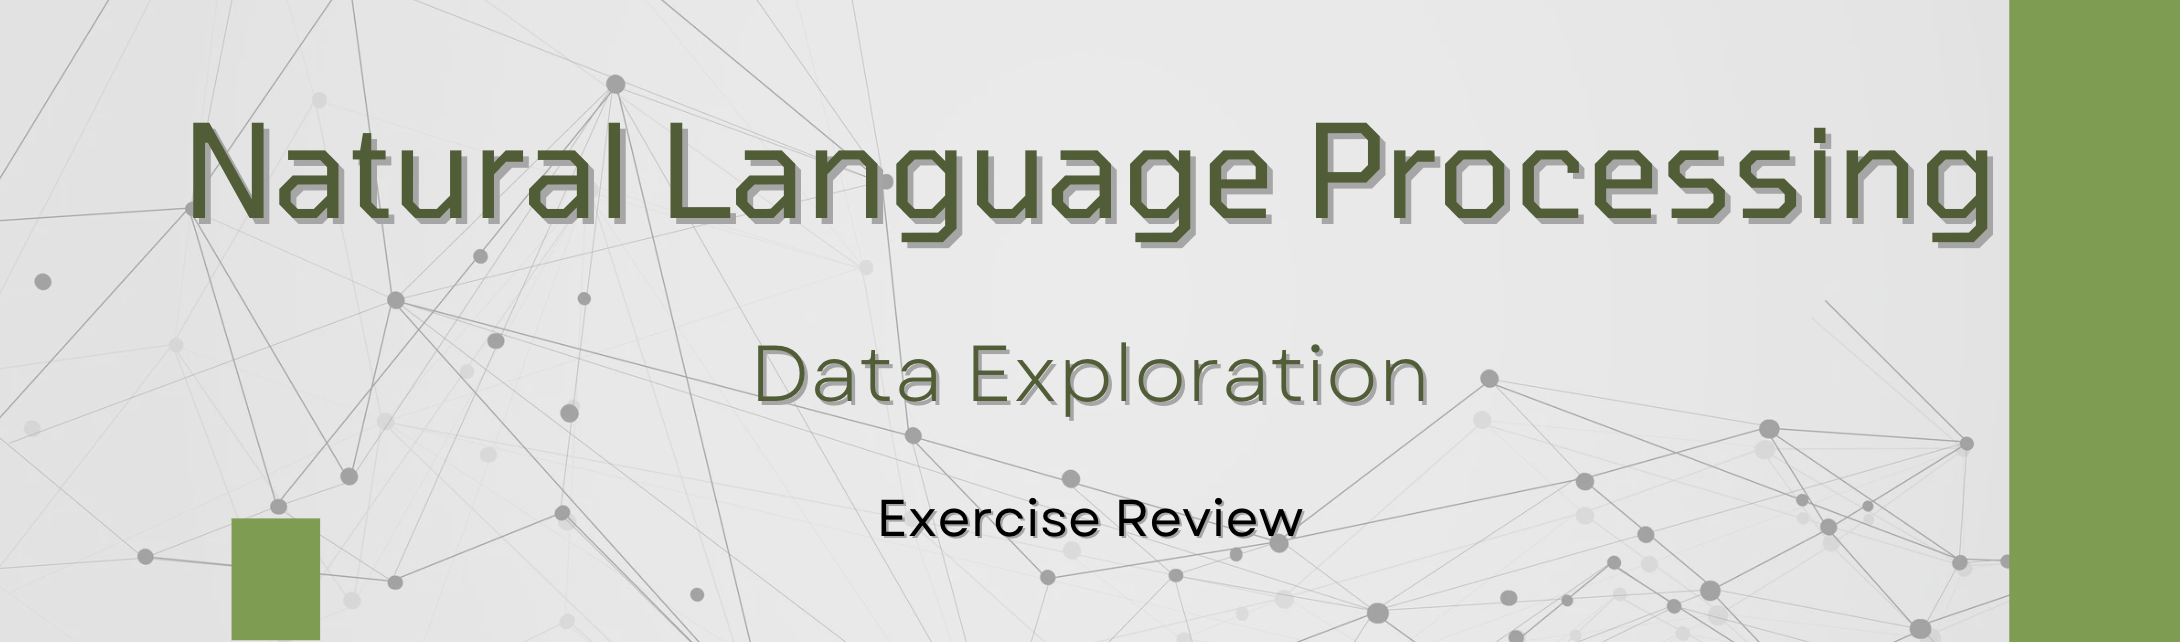
</a>

<hr style="border:2px solid gray">

In [1]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w


Do your work for this exercise in a file named `explore`.

# 1. Spam Data

## 1a. Load the spam data set.

In [2]:
url = w.get_connection_url('spam_db')

sql = 'SELECT * FROM spam'

df = pd.read_sql(sql, url, index_col='id')

df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
# clean the ham words

ham_words = w.clean(' '.join(df[df.label=='ham']['text']))
ham_words[:8]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great']

In [4]:
spam_words = w.clean(' '.join(df[df.label=='spam']['text']))
all_words = w.clean(' '.join(df['text']))


In [5]:
#20 most frequent bigrams in the data

top_20_spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20)
top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [6]:
#make this a function

def make_ngrams(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts().head(20)

In [7]:
test = make_ngrams(spam_words, 2)
test.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [8]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(every, week)           19
(await, collection)     19
(chance, win)           19
(selected, receive)     19
(send, stop)            19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(ur, mob)               15
dtype: int64

In [9]:
#My bigrams are already sorted
top_20_spam_bigrams.sort_values(ascending=False)

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(chance, win)           19
(selected, receive)     19
(send, stop)            19
(await, collection)     19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(ur, mob)               15
dtype: int64

<AxesSubplot:>

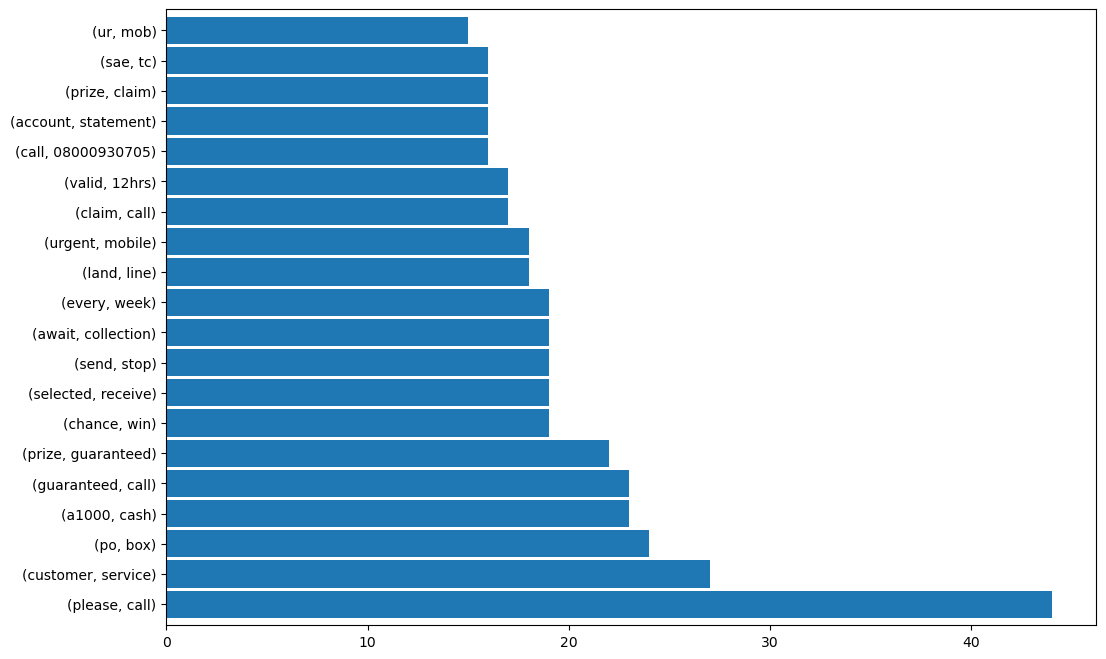

In [11]:
#plot the occurances of the most freq bigrams

top_20_spam_bigrams.sort_values(ascending=False).plot.barh(width=.9, figsize=(12,8))

In [12]:
#to_dict method

top_20_spam_bigrams.to_dict()

{('please', 'call'): 44,
 ('customer', 'service'): 27,
 ('po', 'box'): 24,
 ('a1000', 'cash'): 23,
 ('guaranteed', 'call'): 23,
 ('prize', 'guaranteed'): 22,
 ('every', 'week'): 19,
 ('await', 'collection'): 19,
 ('chance', 'win'): 19,
 ('selected', 'receive'): 19,
 ('send', 'stop'): 19,
 ('land', 'line'): 18,
 ('urgent', 'mobile'): 18,
 ('claim', 'call'): 17,
 ('valid', '12hrs'): 17,
 ('call', '08000930705'): 16,
 ('account', 'statement'): 16,
 ('prize', 'claim'): 16,
 ('sae', 'tc'): 16,
 ('ur', 'mob'): 15}

In [13]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(every, week)           19
(await, collection)     19
(chance, win)           19
(selected, receive)     19
(send, stop)            19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(ur, mob)               15
dtype: int64

In [14]:
#output: {modified key name : freq val}
{k[0]+' '+k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'a1000 cash': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'every week': 19,
 'await collection': 19,
 'chance win': 19,
 'selected receive': 19,
 'send stop': 19,
 'land line': 18,
 'urgent mobile': 18,
 'claim call': 17,
 'valid 12hrs': 17,
 'call 08000930705': 16,
 'account statement': 16,
 'prize claim': 16,
 'sae tc': 16,
 'ur mob': 15}

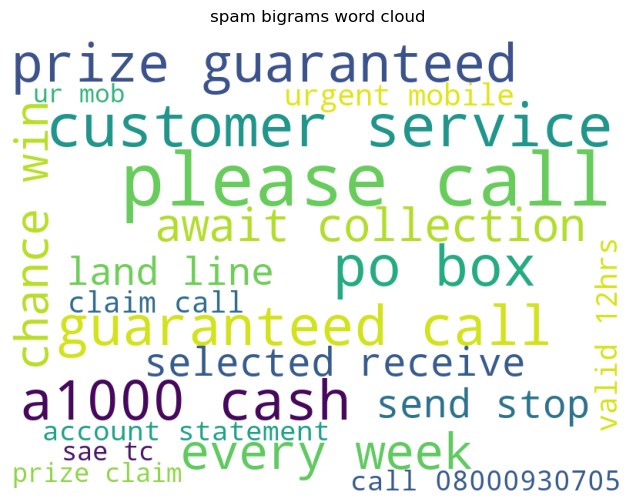

In [15]:
spam_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_bigram_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(spam_bigram_data)

plt.figure(figsize=(10,6))
plt.imshow(spam_bigram_img)
plt.axis("off")
plt.title("spam bigrams word cloud")
plt.show()

In [16]:
def plot_bigrams(words):
    word_data = {k[0]+' '+k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(word_data)

    plt.figure(figsize=(10,6))
    plt.imshow(word_img)
    
    plt.axis("off")
    plt.show()

In [17]:
top_20_ham_bigrams = make_ngrams(ham_words,2)
top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

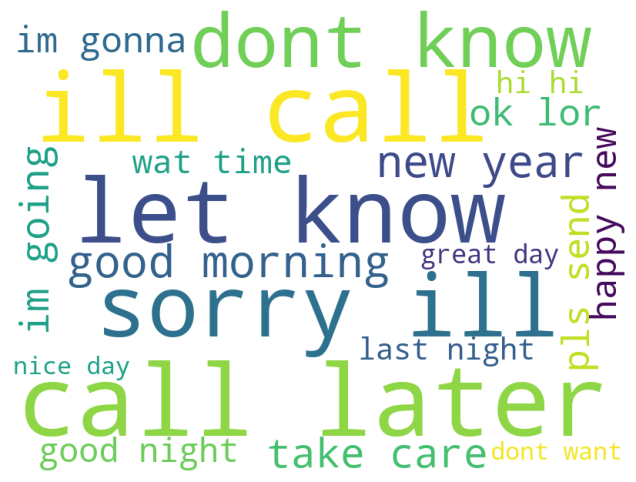

In [18]:
plot_bigrams(top_20_ham_bigrams)

## 1c. Is there any overlap in the bigrams for the spam data and the ham data?

In [19]:
#create a dict of bigrams & freq for ham 

ham_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
ham_bigram_data

{'call later': 52,
 'ill call': 48,
 'let know': 42,
 'sorry ill': 39,
 'dont know': 32,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'im going': 24,
 'ok lor': 22,
 'pls send': 22,
 'im gonna': 20,
 'happy new': 19,
 'good night': 19,
 'wat time': 18,
 'last night': 18,
 'hi hi': 18,
 'great day': 17,
 'nice day': 15,
 'dont want': 15}

In [22]:
spam_bigram_data

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'a1000 cash': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'every week': 19,
 'await collection': 19,
 'chance win': 19,
 'selected receive': 19,
 'send stop': 19,
 'land line': 18,
 'urgent mobile': 18,
 'claim call': 17,
 'valid 12hrs': 17,
 'call 08000930705': 16,
 'account statement': 16,
 'prize claim': 16,
 'sae tc': 16,
 'ur mob': 15}

In [21]:
overlay_list = [bigram for bigram in top_20_spam_bigrams.keys() if bigram in top_20_ham_bigrams.keys()]
overlay_list

[]

## 1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [23]:
top_20_spam_trigrams = make_ngrams(spam_words, 3)
top_20_spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(reply, call, 08000930705)             14
(land, line, claim)                    14
(private, 2003, account)               13
(2003, account, statement)             13
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(camcorder, reply, call)               12
(every, week, txt)                     11
(bonus, caller, prize)                 11
(urgent, trying, contact)              11
(anytime, network, min)                11
(please, call, customer)               11
(customer, service, representative)    10
(cash, await, collection)              10
(speak, live, operator)                10
(a2000, bonus, caller)                 10
(mob, every, week)                      9
(ur, mob, every)                        9
dtype: int64

<AxesSubplot:>

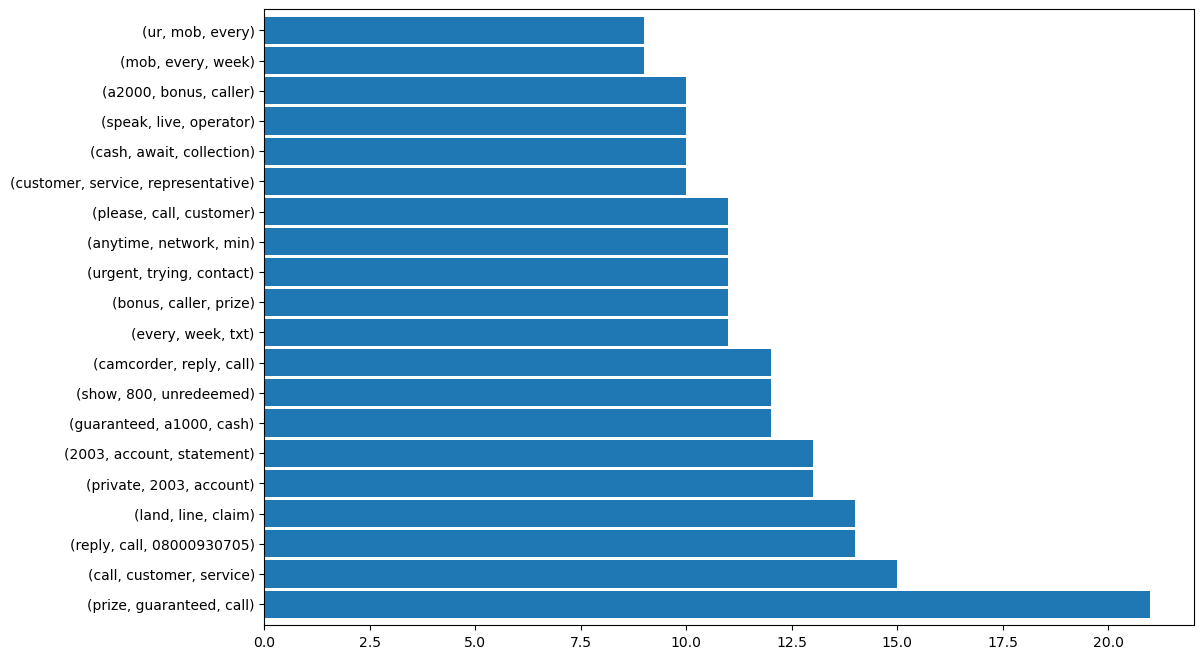

In [25]:
top_20_spam_trigrams.plot.barh(width=.9, figsize=(12,8))

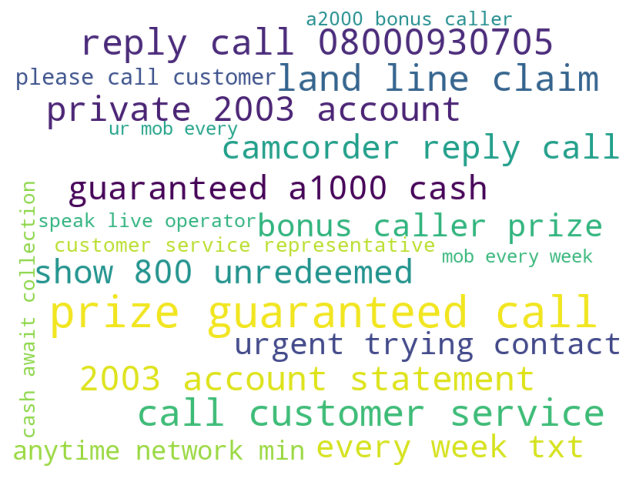

In [26]:
spam_trigram_data = {k[0]+ ' '+k[1]+ ' '+k[2]: v for k,v in top_20_spam_trigrams.to_dict().items()}
spam_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_trigram_img)
plt.axis('off')
plt.show()

In [27]:
#Create a function to automate the process
def plot_trigrams(words):
    
    word_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(word_img)
    
    plt.axis('off')
    
    plt.show()

In [28]:
top_20_ham_trigrams = make_ngrams(ham_words, 3)
top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
dtype: int64

<AxesSubplot:>

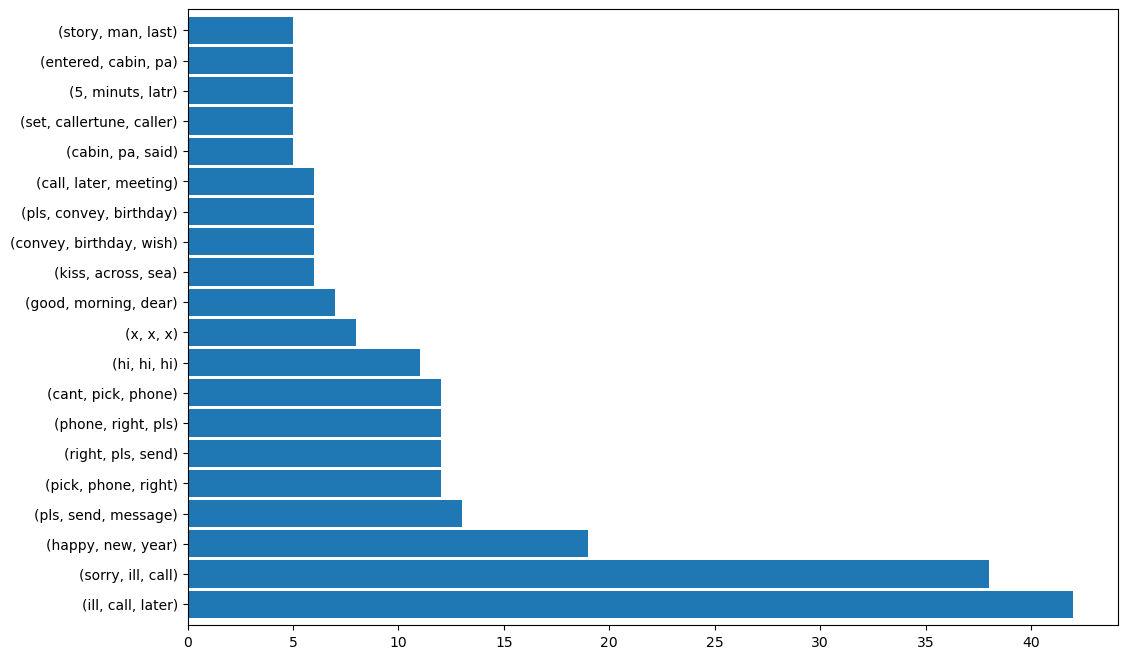

In [29]:
top_20_ham_trigrams.plot.barh(width=.9, figsize=(12,8))

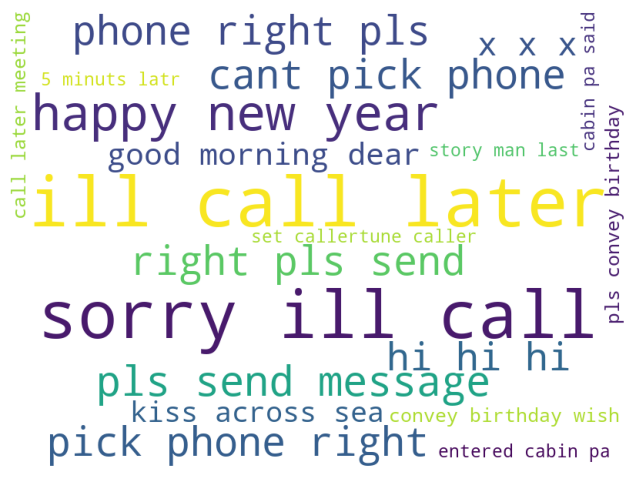

In [30]:
plot_trigrams(top_20_ham_trigrams)

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [31]:
#Read in the clean codeup blog articles
blog_df = pd.read_json('blog_posts.json')

blog_df = blog_df.rename(columns={'content':'original'}).drop(columns=['link', 'date_published'])

blog_df['clean'] = blog_df.original.apply(w.basic_clean).apply(w.tokenize).apply(w.remove_stopwords)
blog_df['stem'] = blog_df.clean.apply(w.stem)
blog_df['lemmatized'] = blog_df.clean.apply(w.lemmatize)
blog_df

,title,original,clean,stem,lemmatized
0,Spotlight on APIDA Voices: Celebrating Heritag...,\nMay is traditionally known as Asian American...,may traditionally known asian american pacific...,may tradit known asian american pacif island a...,may traditionally known asian american pacific...
1,Women in tech: Panelist Spotlight – Magdalena ...,\nWomen in tech: Panelist Spotlight – Magdalen...,women tech panelist spotlight magdalena rahn c...,women tech panelist spotlight magdalena rahn c...,woman tech panelist spotlight magdalena rahn c...
2,Women in tech: Panelist Spotlight – Rachel Rob...,\nWomen in tech: Panelist Spotlight – Rachel R...,women tech panelist spotlight rachel robbinsma...,women tech panelist spotlight rachel robbinsma...,woman tech panelist spotlight rachel robbinsma...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,\nWomen in tech: Panelist Spotlight – Sarah Me...,women tech panelist spotlight sarah mellor cod...,women tech panelist spotlight sarah mellor cod...,woman tech panelist spotlight sarah mellor cod...
4,Women in Tech: Panelist Spotlight – Madeleine ...,\nWomen in tech: Panelist Spotlight – Madelein...,women tech panelist spotlight madeleine capper...,women tech panelist spotlight madelein capper ...,woman tech panelist spotlight madeleine capper...
5,Black Excellence in Tech: Panelist Spotlight –...,\nBlack excellence in tech: Panelist Spotlight...,black excellence tech panelist spotlight wilma...,black excel tech panelist spotlight wilmari de...,black excellence tech panelist spotlight wilma...


In [33]:
#join the words together into one body of text

blog_words = ' '.join(blog_df['lemmatized'])
#blog_words

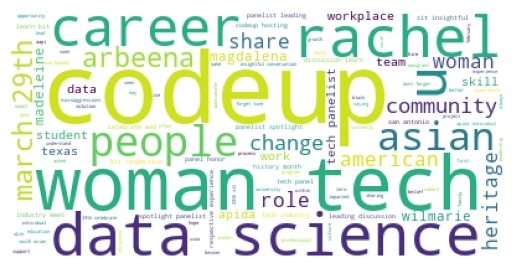

In [34]:
#create a word cloud

blog_img = WordCloud(background_color="white").generate(blog_words)
plt.imshow(blog_img)
plt.axis("off")
plt.show()

In [35]:
#create bigrams

top_20_blog_bigrams = make_ngrams(blog_words, 2)
top_20_blog_bigrams.head()

(e,  )    221
(i, n)    144
(o, n)    140
(n,  )    139
(t,  )    135
dtype: int64

In [38]:
# create a list

blog_words = list(blog_words.split())

In [39]:
top_20_blog_bigrams = make_ngrams(blog_words, 2)
top_20_blog_bigrams.head()

(woman, tech)          12
(data, science)        12
(march, 29th)           8
(industry, meet)        5
(panelist, leading)     5
dtype: int64

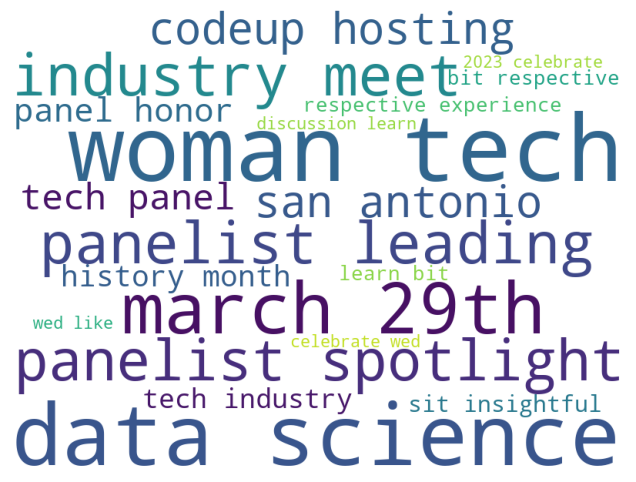

In [40]:
plot_bigrams(top_20_blog_bigrams)

In [41]:
#create trigrams

top_20_blog_trigrams = make_ngrams(blog_words, 3)
top_20_blog_trigrams.head()

(tech, industry, meet)             5
(discussion, learn, bit)           5
(celebrate, wed, like)             5
(2023, celebrate, wed)             5
(sit, insightful, conversation)    5
dtype: int64

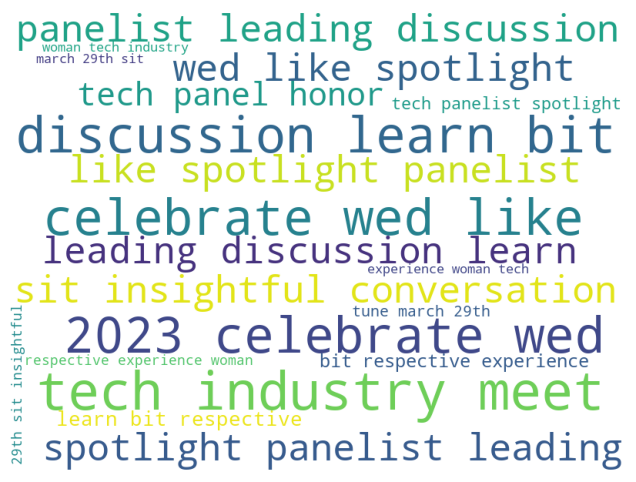

In [42]:
plot_trigrams(top_20_blog_trigrams)

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.

In [43]:
#Read in the clean codeup blog articles
news_df = pd.read_json('news_articles.json')
news_df = news_df.rename(columns={'content':'original'}).drop(columns=['title'])

news_df['clean'] = news_df.original.apply(w.basic_clean).apply(w.tokenize).apply(w.remove_stopwords)
news_df['stem'] = news_df.clean.apply(w.stem)
news_df['lemmatized'] = news_df.clean.apply(w.lemmatize)
news_df.head()

,category,original,clean,stem,lemmatized
0,business,The Central Consumer Protection Authority (CCP...,central consumer protection authority ccpa imp...,central consum protect author ccpa impos penal...,central consumer protection authority ccpa imp...
1,business,Google's collaborative advertisement with the ...,google ' collaborative advertisement governmen...,googl ' collabor advertis govern featur financ...,google ' collaborative advertisement governmen...
2,business,Tech Mahindra CEO CP Gurnani's total remunerat...,tech mahindra ceo cp gurnani ' total remunerat...,tech mahindra ceo cp gurnani ' total remuner f...,tech mahindra ceo cp gurnani ' total remunerat...
3,business,Union Minister Nitin Gadkari said that India w...,union minister nitin gadkari said india soon v...,union minist nitin gadkari said india soon veh...,union minister nitin gadkari said india soon v...
4,business,The initial public offering (IPO) of India's l...,initial public offering ipo india ' largest dr...,initi public offer ipo india ' largest drone m...,initial public offering ipo india ' largest dr...


In [47]:
#create a list of words only found in lemmatized BUSINESS articles

business_words = list(' '.join(news_df[news_df['category'] == 'business']['lemmatized']).split())
business_words[:3]

['central', 'consumer', 'protection']

In [48]:
#Repeat the process for other categories
sports_words = list(' '.join(news_df[news_df['category'] == 'sports']['lemmatized']).split())
technology_words = list(' '.join(news_df[news_df['category'] == 'technology']['lemmatized']).split())
entertainment_words = list(' '.join(news_df[news_df['category'] == 'entertainment']['lemmatized']).split())

In [50]:
#What are my most frequent business words? Anything wrong here?
business_top_20 = pd.Series(business_words).value_counts().head(20)

business_top_20

'             32
said          20
crore         14
bank          13
india         13
company        9
mall           6
added          6
technology     6
rbi            6
monday         6
note           6
per            6
airtel         5
minister       4
budget         4
earlier        4
icici          4
2000           4
several        4
dtype: int64

In [51]:
#Repeat the process for the other categories
sports_top_20 = pd.Series(sports_words).value_counts().head(20)
technology_top_20 = pd.Series(technology_words).value_counts().head(20)
entertainment_top_20 = pd.Series(entertainment_words).value_counts().head(20)

In [52]:
#Remove the pesky apostrophe
business_top_20 = business_top_20.drop("'")
sports_top_20 = sports_top_20.drop("'")
technology_top_20 = technology_top_20.drop("'")
entertainment_top_20 = entertainment_top_20.drop("'")

In [53]:
#Compile my most frequent words from each category in one dataframe
top_words = pd.concat([pd.DataFrame(business_top_20).reset_index(),
                       pd.DataFrame(sports_top_20).reset_index(),
                       pd.DataFrame(technology_top_20).reset_index(),
                       pd.DataFrame(entertainment_top_20).reset_index()])

In [54]:
#Housecleaning
top_words.rename(columns={'index': 'word', 0: 'count'}, inplace=True)

top_words.head()

,word,count
0,said,20
1,crore,14
2,bank,13
3,india,13
4,company,9


In [55]:
#Are any words frequently used across multiple subjects?
top_words['word'].value_counts().head(20)

said          4
added         4
india         3
minister      2
crore         2
also          2
video         2
year          2
company       2
technology    2
court         1
taara         1
google        1
patel         1
story         1
service       1
u             1
person        1
elon          1
musk          1
Name: word, dtype: int64

In [56]:
#Many frequently occurring words look business/technology related..
for word in list(business_top_20.index):
    
    if word in list(technology_top_20.index):
        
        print('Match found with word: {}!'.format(word))
        
    else:
        
        continue

Match found with word: said!
Match found with word: crore!
Match found with word: india!
Match found with word: company!
Match found with word: added!
Match found with word: technology!
Match found with word: minister!


In [57]:
#Create bigrams from each category's words
business_bigrams = make_ngrams(business_words, 2)
sports_bigrams = make_ngrams(sports_words, 2)
technology_bigrams = make_ngrams(technology_words, 2)
entertainment_bigrams = make_ngrams(entertainment_words, 2)

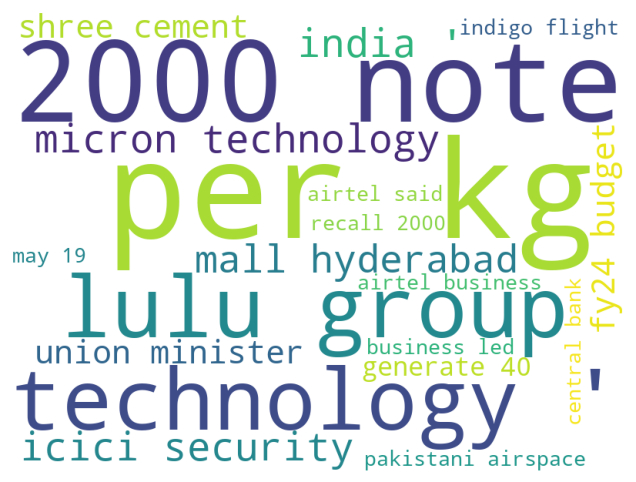

In [58]:
#Plot business
plot_bigrams(business_bigrams)

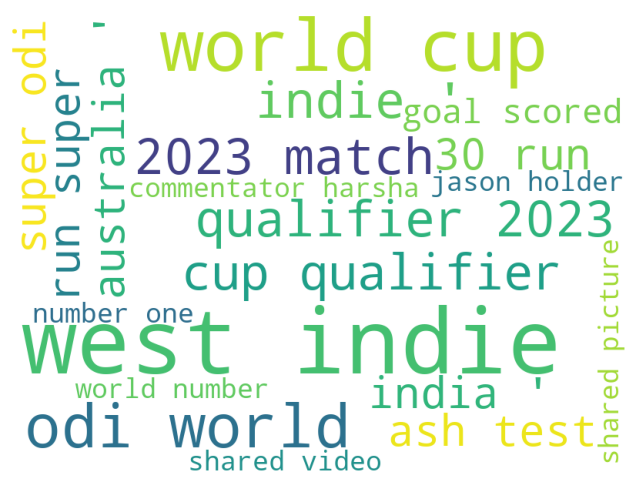

In [59]:
#Plot sports
plot_bigrams(sports_bigrams)

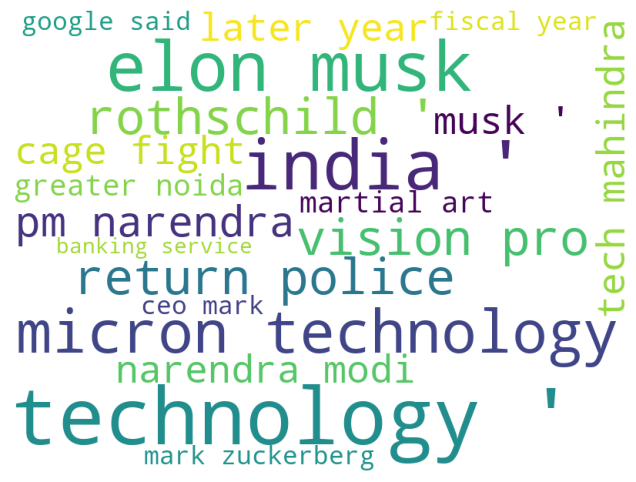

In [60]:
#Plot technology
plot_bigrams(technology_bigrams)

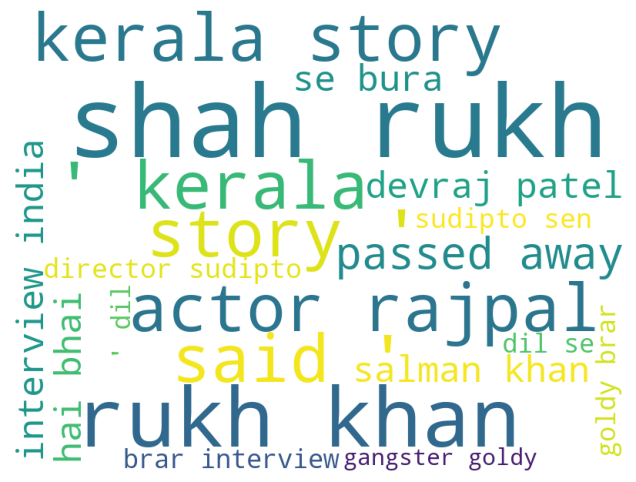

In [61]:
#Plot entertainment
plot_bigrams(entertainment_bigrams)